<b>EDA</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [4]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

<b>Confirming 100 unique accounts in dataset</b>

In [5]:
df["account"].nunique()

100

<b> Droping irrevelant Attributes</b>

In [6]:
df = df[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [7]:
df.shape

(12043, 11)

<b> Exploratory Data Analysis</b>

<b>Total Number of Transactions according to date</b>

In [8]:
df["date"].value_counts().mean                                        #On average 174 transcation ocuur each day

<bound method Series.mean of 2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
2018-08-03    157
2018-10-26    157
2018-08-24    156
2018-09-13    154
2018-10-12    154
2018-08-31    153
2018-08-23    152
2018-08-02    152
2018-09-07    152
2018-09-06    152
2018-08-10    151
2018-10-18    150
2018-08-22    150
2018-09-26    149
2018-09-05    149
2018-09-12    149
2018-08-09    149
2018-10-24    148
2018-09-19    148
2018-10-10    146
             ... 
2018-08-19    118
2018-08-21    118
2018-09-11    118
2018-09-16    118
2018-09-25    117
2018-08-14    117
2018-08-26    116
2018-09-23    114
2018-08-07    114
2018-10-09    113
2018-10-15    112
2018-09-17    112
2018-10-22    112
2018-08-27    111
2018-09-03    109
2018-08-12    109
2018-09-30    107
2018-10-07    105
2018-08-13    104
2018-10-01    103
2018-09-10    103
2018-10-29    102
2018-10-16    102

In [9]:
#Function to get date of month
def get_dom(date):
    return date.day

df['dom'] = df['date'].map(get_dom)
df.tail()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,dom
12038,authorized,0.0,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,CUS-55310383,debit,31
12039,authorized,1.0,9137.79,2018-10-31,M,20,Casula,NSW,63.87,CUS-2688605418,debit,31
12040,authorized,1.0,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,CUS-2663907001,debit,31
12041,authorized,1.0,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,CUS-1388323263,debit,31
12042,authorized,1.0,5517.91,2018-10-31,M,31,Mascot,NSW,22.36,CUS-3129499595,debit,31


Text(0.5, 1.0, 'Number of Transcation w.r.t. dates of month')

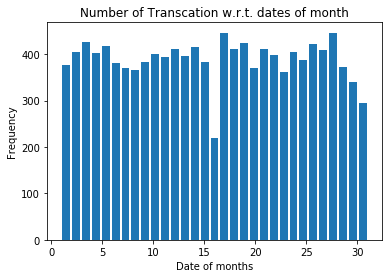

In [10]:
plt.hist(df.dom, bins = 31, rwidth = 0.8)
plt.xlabel("Date of months")                                        # Less number of transaction during month's end
plt.ylabel("Frequency")
plt.title("Number of Transcation w.r.t. dates of month")

In [11]:
#Function to gte weekday 

def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)
df.tail()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,dom,weekday
12038,authorized,0.0,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,CUS-55310383,debit,31,2
12039,authorized,1.0,9137.79,2018-10-31,M,20,Casula,NSW,63.87,CUS-2688605418,debit,31,2
12040,authorized,1.0,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,CUS-2663907001,debit,31,2
12041,authorized,1.0,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,CUS-1388323263,debit,31,2
12042,authorized,1.0,5517.91,2018-10-31,M,31,Mascot,NSW,22.36,CUS-3129499595,debit,31,2


Text(0.5, 1.0, 'Number of Transcation w.r.t. weekdays')

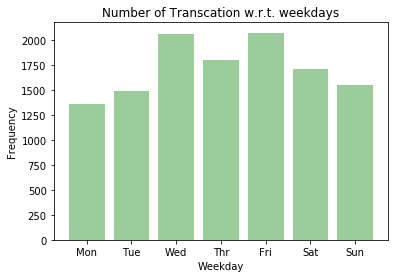

In [12]:
plt.hist(df.weekday, bins=7, range=(-0.5,6.5), alpha=0.4, color='green', rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')                                                    # Maximum transcation on mid-days of week
plt.title('Number of Transcation w.r.t. weekdays')

<b>ANZ Customer w.r.t. Age</b>

In [13]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df["Months"] = months
df["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

In [14]:
df_cus_aug = df[df["Months"] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df["Months"] == "August"].groupby("gender").mean()

In [15]:

mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

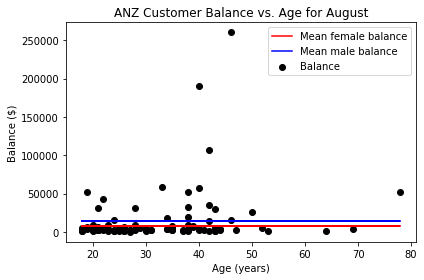

In [16]:
plt.figure()
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c="black", label="Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [17]:
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]

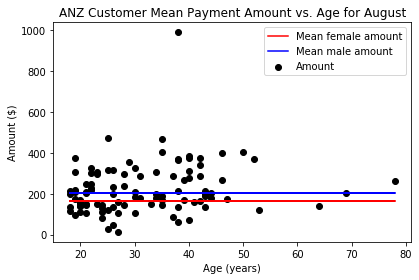

In [18]:
plt.scatter(df_cus_aug["age"], df_cus_aug["amount"], c="black", label="Amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()                                            #Mean male payment amount is around $200 for month of August
plt.tight_layout()

In [19]:
df_cus_sep = df[df["Months"] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df["Months"] == "September"].groupby("gender").mean()

mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

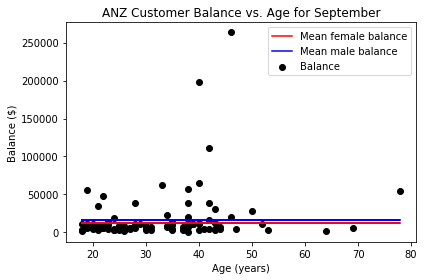

In [20]:
plt.figure()
plt.scatter(df_cus_sep["age"], df_cus_sep["balance"], c="black", label="Balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

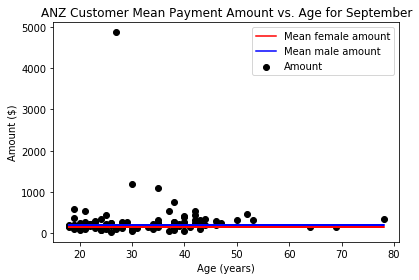

In [21]:
mean_f_amt_sep = df_gen_sep["amount"].iloc[0]
mean_m_amt_sep = df_gen_sep["amount"].iloc[1]
plt.scatter(df_cus_sep["age"], df_cus_sep["amount"], c="black", label="Amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()                                #
plt.tight_layout()

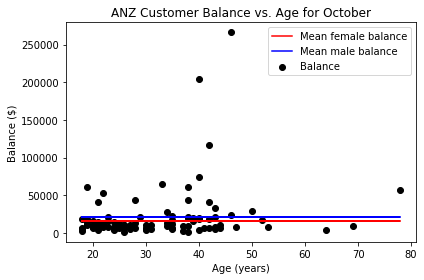

In [22]:
df_cus_oct = df[df["Months"] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df["Months"] == "October"].groupby("gender").mean()
mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])
plt.scatter(df_cus_oct["age"], df_cus_oct["balance"], c="black", label="Balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

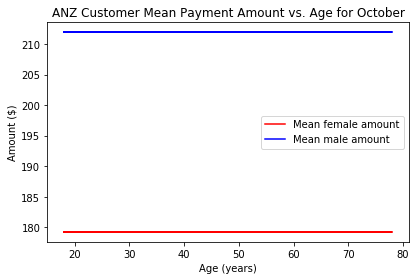

In [23]:
mean_f_amt_oct = df_gen_oct["amount"].iloc[0]
mean_m_amt_oct = df_gen_oct["amount"].iloc[1]
plt.plot(df_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()